# Generator functions

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2019 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random 

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

**Exercise:** In  the  book  I  wrote  a  version  of `random_pairs` that  violates  Ned’s  recommendation  to “abstract your iteration”:

In [2]:
def flip(p):
    return np.random.random() < p

In [6]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

In [3]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j and flip(p):
                yield u, v

In [4]:
nodes = range(4)

In [7]:
for pair in all_pairs(nodes):
    print(pair)

(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)


In [8]:
for pair in random_pairs(nodes, 0.5):
    print(pair)

(0, 2)
(1, 2)
(1, 3)


Write a better version of this function that *uses* `all_pairs` rather than copying and modifying it.

In [17]:
# Solution goes here
def better_random_pairs(nodes, p):
    for pair in all_pairs(nodes):
        if flip(p): 
            yield pair

for pair in better_random_pairs(nodes, 0.5):
    print(pair)

(0, 1)
(0, 2)
(1, 2)
(1, 3)


In [9]:
for pair in random_pairs(nodes, 0.5):
    print(pair)

**Exercise:**  Write a function called `random_tree` that takes a number of nodes, `n`, as a parameter and builds an undirected graph by starting with a single node, adding one node at a time, and connecting each new node to one existing node. You can use any of the functions in Python’s `random` module.

In [51]:
# Solution goes here
def make_random_tree(n):
    G = nx.DiGraph()
    G.add_node(0)
    for i in range(1,n):
        G.add_edge(random.randrange(i), i)
    return G

In [59]:
tree = make_random_tree(10)
list(tree)
len(list(tree.edges()))

9

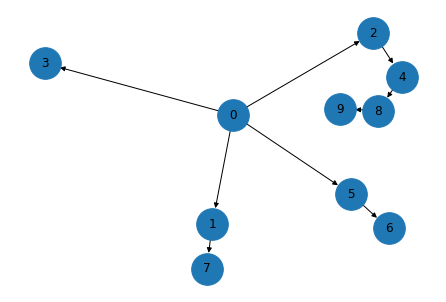

In [53]:
nx.draw(tree, 
        node_color='C0', 
        node_size=1000, 
        with_labels=True)

**Bonus:** Read the various equivalent definitions of tree and then write a function called `is_tree` that takes a graph and returns `True` if the graph is a tree.

In [64]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

def is_tree(G):
    if is_connected(G):
        return (len(list(G.nodes)) - 1) == len(list(G.edges()))
    
is_tree(tree)

True

**Exercise:** Write a function called `all_triangles` that takes an undirected graph as a parameter and returns all triangles, where a triangle is a collection of three nodes that are connected to each other (regardless of whether they are also connected to other nodes). Your solution can be an ordinary function that returns a list of tuples, or a generator function that yields tuples.  It does not have to be particularly efficient. It’s OK if your solution finds the same triangle more than once, but as a bonus challenge, write a solution that avoids it.

In [66]:
# Solution goes here
            
def all_triangles(G):
    for u,v in G.edges():
        ws = set(G.neighbors(u)) & set(G.neighbors(v))
        for w in ws:
            yield u,v,w

In [14]:
# Solution goes here

In [67]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

In [68]:
complete = make_complete_graph(3)
complete.nodes()

NodeView((0, 1, 2))

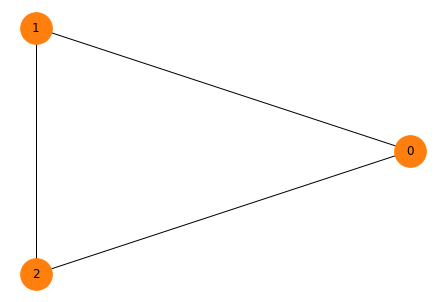

In [69]:
nx.draw_circular(complete, 
                 node_color='C1', 
                 node_size=1000, 
                 with_labels=True)

In [70]:
for tri in all_triangles(complete):
    print(tri)

(0, 1, 2)
(0, 2, 1)
(1, 2, 0)


In [71]:
for tri in all_triangles(tree):
    print(tri)